# Naparify measurement

...or how to pass abbstract data types between napari and napari-stress more freely

In [1]:
import napari
import napari_stress
import numpy as np

import inspect
from magicgui import magicgui

In [17]:
def some_function(parameter1: napari_stress.types.manifold, parameter2: napari_stress.types.Curvature, sigma: float) -> (np.ndarray, dict, dict):
    features = {'feature1': np.random.random(434)}
    metadata = {'test': 'yes!'}
    return None, features, metadata

Investigate the signature of the dummy function as-is:

In [18]:
inspect.signature(some_function)

<Signature (parameter1: napari_stress._stress.manifold_SPB.manifold, parameter2: <function NewType.<locals>.new_type at 0x000002673A9BED30>, sigma: float) -> (<class 'numpy.ndarray'>, <class 'dict'>, <class 'dict'>)>

Now we use the `naparify_measurement` decorator and see that the decorator correctly replaces some of the input annotations with `napari.layers.Points`:

In [19]:
decorated_function = napari_stress.measurements.utils.naparify_measurement(some_function)
inspect.signature(decorated_function)

<Signature (parameter1: 'napari.layers.Points', parameter2: 'napari.layers.Points', sigma: float)>

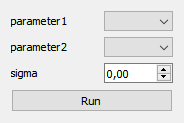

In [5]:
magicgui(decorated_function)

### Test on real  data

In [6]:
viewer = napari.Viewer()

pointcloud = napari_stress.get_droplet_point_cloud()[0]
viewer.add_points(pointcloud[0][:, 1:], **pointcloud[1])

expansion = napari_stress.fit_spherical_harmonics(viewer.layers[-1].data)
viewer.add_points(expansion[0], **expansion[1])

lebedev_points = napari_stress._spherical_harmonics.spherical_harmonics_napari.perform_lebedev_quadrature(viewer.layers[-1], viewer=viewer)
results_layer = viewer.layers[-1]

The `napari_stress.measurements.calculate_mean_curvature_on_manifold` function is annotated like this:

In [7]:
napari_stress.measurements.calculate_mean_curvature_on_manifold(results_layer)

Old: <class 'napari_stress._stress.manifold_SPB.manifold'> New: napari.layers.Points


In [8]:
results_layer.features.keys()

Index(['error', 'Mean_curvature'], dtype='object')

In [9]:
results_layer.metadata.keys()

dict_keys(['spherical_harmonics_coefficients', 'spherical_harmonics_implementation', 'manifold', 'H0_arithmetic_average', 'H0_surface_integral'])

In [20]:
decorated_function(results_layer, results_layer, sigma=1)

Old: <class 'napari_stress._stress.manifold_SPB.manifold'> New: napari.layers.Points
Old: <function NewType.<locals>.new_type at 0x000002673A9BED30> New: napari.layers.Points
Old: <class 'float'> New: <class 'float'>


In [24]:
results_layer.features.keys()

Index(['error', 'Mean_curvature', 'feature1'], dtype='object')

In [23]:
results_layer.metadata.keys()

dict_keys(['spherical_harmonics_coefficients', 'spherical_harmonics_implementation', 'manifold', 'H0_arithmetic_average', 'H0_surface_integral', 'test'])